In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
import matplotlib.mlab as mlab
from matplotlib.patches import Ellipse

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
om_s8_list_fid = np.genfromtxt("om_s8_list_fid5000.txt", delimiter=",")
om_s8_list_swp = np.genfromtxt("om_s8_list_swp900x10.txt", delimiter=",")

In [3]:
a0      = 0.1       #the initial epoch from where we begin the evolution, a0=0 corresponds to birth but is numerically unstable
z       = 0.5
af      = 1.0 / (1.0 + z)       #final epoch where we visualize structures, af=1 corresponds to today
n_steps = 10        #number of time-steps to split the total evolution into
L       = 256       #Physical size of the Universe in Mpc/h
N       = 160        #Number of mesh-points along one axis, size of the cube. Then the number of particles will be N^3
batch   = 1         #Batch size, how many independent Universes to simulate

arg_k_ = 5
res_len = 64

vec_fid = []
for i in range(om_s8_list_fid.shape[0]):
    vec_fid.append(np.load("inference_fid5000_swp10000x1/vecGen/fs_{}_{}_{}_{}_{}_{}_{}_{}_fid_{}_{}_{}.npy".format(str(np.round(om_s8_list_fid[i,0], decimals=6)), str(np.round(om_s8_list_fid[i,1], decimals=6)), a0, z, n_steps, L, N, batch, str(int(om_s8_list_fid[i,-1])), arg_k_, res_len)))

vec_swp = []
for i in range(om_s8_list_swp.shape[0]):
    vec_swp.append(np.load("inference_swp900x10/vecGen/fs_{}_{}_{}_{}_{}_{}_{}_{}_swp_{}_{}_{}.npy".format(str(np.round(om_s8_list_swp[i,0], decimals=6)), str(np.round(om_s8_list_swp[i,1], decimals=6)), a0, z, n_steps, L, N, batch, str(int(om_s8_list_swp[i,-1])), arg_k_, res_len)))

N_cov = 4990
# ind = np.concatenate((np.arange(0,res_len*3),np.arange(res_len*6,res_len*9)))  # B+D
ind = np.concatenate((np.arange(0,res_len*3),np.arange(res_len*3,res_len*6)))  # B+P
vec_cov = np.array(vec_fid)[:N_cov,ind]
vec_fid = np.array(vec_fid)[N_cov:,ind]
vec_swp = np.array(vec_swp)[:,ind]

In [4]:
swp_mul = 10
avg_over = 4
vec_fid = np.array([np.mean(vec_fid, axis=0)])

dummy = []
for i in range(int(vec_cov.shape[0]/swp_mul)):
    dummy.append(np.mean(vec_cov[i*swp_mul:i*swp_mul+avg_over,:], axis=0))
vec_cov = np.array(dummy)

dummy = []
for i in range(int(vec_swp.shape[0]/swp_mul)):
    dummy.append(np.mean(vec_swp[i*swp_mul:i*swp_mul+avg_over,:], axis=0))
vec_swp = np.array(dummy)

print(vec_cov.shape)
print(vec_fid.shape)
print(vec_swp.shape)

(499, 384)
(1, 384)
(900, 384)


In [5]:
def res_changer(vec_high_res, res_len_low):
    sum_width = int(vec_high_res.shape[1]/res_len_low)
    print(sum_width)
    vec_low_res = np.zeros((vec_high_res.shape[0], res_len_low))
    for i in range(vec_high_res.shape[0]):
        for j in range(res_len_low):
            vec_low_res[i,j] = np.sum(vec_high_res[i,j*sum_width:(j+1)*sum_width])
    
    return vec_low_res

In [6]:
# Raw res is 64*3*2=576
res_len_low = 96
vec_cov = res_changer(vec_cov, res_len_low)
vec_fid = res_changer(vec_fid, res_len_low)
vec_swp = res_changer(vec_swp, res_len_low)

4
4
4


In [7]:
# empty_col = []
# for i in range(vec_cov.shape[1]):
#     if np.sum(vec_cov[:,i]) == 0:
#         empty_col.append(i)
# print(empty_col)
# empty_col = np.array(empty_col)

# non_empty_col = np.delete(np.arange(vec_cov.shape[1]), empty_col)
# print(non_empty_col.shape)

# vec_cov = vec_cov[:,non_empty_col]
# vec_fid = vec_fid[:,non_empty_col]
# vec_swp = vec_swp[:,non_empty_col]

In [8]:
print(vec_cov.shape)
print(vec_fid.shape)
print(vec_swp.shape)

(499, 96)
(1, 96)
(900, 96)


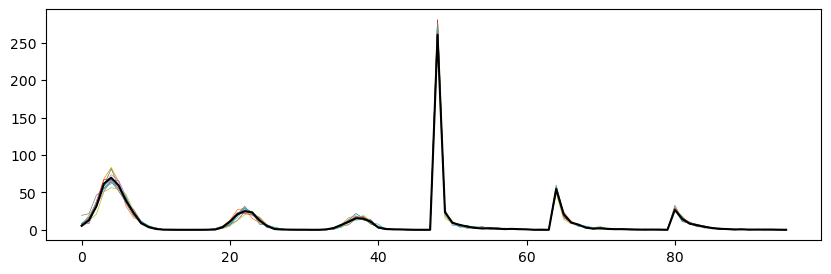

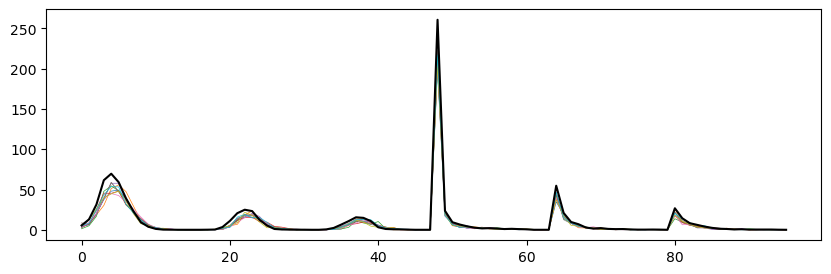

In [9]:
# plt.figure(figsize=(20,3))
# for i in range(10):
#     plt.plot(np.arange(vec_cov.shape[1]), vec_cov[i,:], lw=0.5)
# plt.plot(np.arange(vec_cov.shape[1]), np.mean(vec_fid, axis=0), lw=2, c="black")
# plt.show()

# plt.figure(figsize=(20,5))
# for i in range(10):
#     plt.plot(np.arange(vec_cov.shape[1]), np.mean(vec_fid[i*10:(i+1)*10,:], axis=0), lw=0.5)
# plt.plot(np.arange(vec_cov.shape[1]), np.mean(vec_fid, axis=0), lw=1.5, c="black")
# plt.show()

# plt.figure(figsize=(20,5))
# for i in range(10):
#     plt.plot(np.arange(vec_swp.shape[1]), vec_swp[np.random.choice(np.arange(10000)),:], lw=0.5)
# plt.plot(np.arange(vec_cov.shape[1]), np.mean(vec_fid, axis=0), lw=1.5, c="black")
# plt.show()

plt.figure(figsize=(10,3))
for i in range(10):
    plt.plot(np.arange(vec_cov.shape[1]), vec_cov[i,:], lw=0.5)
plt.plot(np.arange(vec_cov.shape[1]), vec_fid[0], lw=1.5, c="black")
plt.show()

plt.figure(figsize=(10,3))
for i in range(10):
    plt.plot(np.arange(vec_swp.shape[1]), vec_swp[i,:], lw=0.5)
plt.plot(np.arange(vec_cov.shape[1]), vec_fid[0], lw=1.5, c="black")
plt.show()

In [10]:
cov = np.cov(vec_cov.T)
corr = np.corrcoef(vec_cov.T)

In [11]:
print(0 in cov)
print(np.linalg.det(cov))

False
5.69644055552986e-61


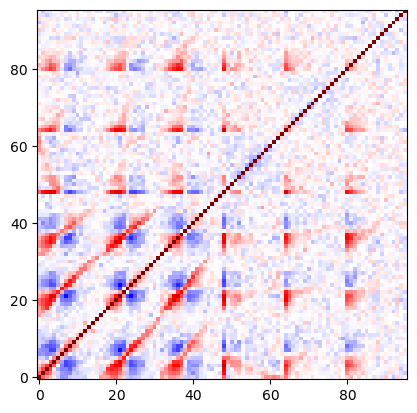

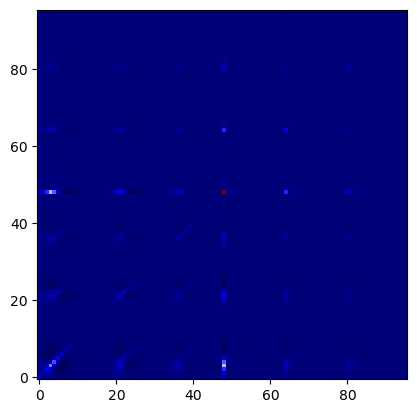

In [12]:
plt.imshow(corr, origin='lower', cmap='seismic', norm=mpl.colors.Normalize(vmin=-1, vmax=1))
plt.show()

plt.imshow(cov, origin='lower', cmap='seismic', norm=mpl.colors.Normalize())
plt.show()

In [13]:
def ln_Gaussian_likelihood_no_norm(x, x_fid, cov):
    power = -0.5*np.matmul(np.matmul(x-x_fid, np.linalg.inv(cov)), x-x_fid)
    return power

In [14]:
post = np.zeros((int(np.sqrt(vec_swp.shape[0])),int(np.sqrt(vec_swp.shape[0]))))
for i in range(vec_swp.shape[0]):
    if i % 100 == 0:
        print(i)
    post[int(i%int(np.sqrt(vec_swp.shape[0]))), int(i/int(np.sqrt(vec_swp.shape[0])))] = ln_Gaussian_likelihood_no_norm(vec_swp[i], vec_fid[0], cov)

0
100
200
300
400
500
600
700
800


In [15]:
# print(post)
# print(np.amax(post))
# print(post+np.abs(np.amin(post)))
# print(post)
# np.save("post", post)

# plt.imshow(post, origin='lower', cmap='seismic', norm=mpl.colors.Normalize())
# plt.title("~ln(posterior)")
# plt.ylabel("s8")
# plt.xlabel("om")
# plt.xticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.2589,0.3589,5,endpoint=True), decimals=3))
# plt.yticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.7659,0.8659,5,endpoint=True), decimals=3))
# plt.show()

In [16]:
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Make data.
# X = np.arange(0,30)
# Y = np.arange(0,30)
# X, Y = np.meshgrid(X, Y)
# Z = post

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.view_init(elev=50, azim=250)
# plt.show()

In [17]:
def ln_gauss2d_no_norm(xy, x0, y0, a, c, b):  # a, c, b are from the inverse of the covariance matrix
    x, y = xy
    inner = a * (x - x0)**2
    inner += 2 * c * (x - x0) * (y - y0)
    inner += b * (y - y0)**2
    return -0.5*inner

In [18]:
x = []
y = []
for i in range(30):
    for j in range(30):
        y.append(i)
        x.append(j)
xy = (x, y)

z = post.flatten()

i = z.argmax()
guess = [x[i], y[i], 1, 1, 1]
pred_params, uncert_cov = curve_fit(ln_gauss2d_no_norm, xy, z, p0=guess, maxfev=10000)
print(pred_params)

[14.77725838 13.78721049  0.96274485  0.05922013  0.82743671]


In [19]:
cov_inv_pred = np.array([[pred_params[2], pred_params[3]], [pred_params[3], pred_params[4]]])
cov_pred = np.linalg.inv(cov_inv_pred)
mean_pred = np.array([pred_params[0], pred_params[1]])
print(mean_pred[0]*(0.3589-0.2589)/30+0.2589)
print(mean_pred[1]*(0.8659-0.7659)/30+0.7659)
print(np.sqrt(cov_pred[0,0])*(0.3589-0.2589)/30)
print(np.sqrt(cov_pred[1,1])*(0.8659-0.7659)/30)
mean_pred_param_space = np.array([pred_params[0]*(0.3589-0.2589)/30+0.2589, pred_params[1]*(0.8659-0.7659)/30+0.7659])
cov_pred_param_space = np.array([[(np.sqrt(cov_pred[0,0])*(0.3589-0.2589)/30)**2, cov_pred[0,1]*((0.3589-0.2589)/30)*((0.8659-0.7659)/30)], [cov_pred[0,1]*((0.3589-0.2589)/30)*((0.8659-0.7659)/30), (np.sqrt(cov_pred[1,1])*(0.8659-0.7659)/30)**2]])
print(mean_pred_param_space)
print(cov_pred_param_space)
print(np.linalg.inv(cov_pred_param_space))

0.3081575279375054
0.8118573683045263
0.0034047186529159437
0.003672564560782706
[0.30815753 0.81185737]
[[ 1.15921091e-05 -8.29654099e-07]
 [-8.29654099e-07  1.34877305e-05]]
[[86647.03647272  5329.81210351]
 [ 5329.81210351 74469.30407992]]


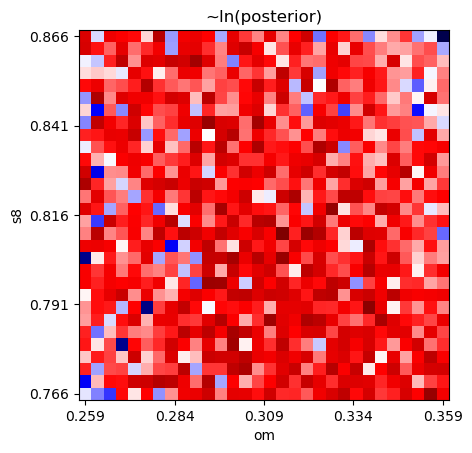

(30, 30)


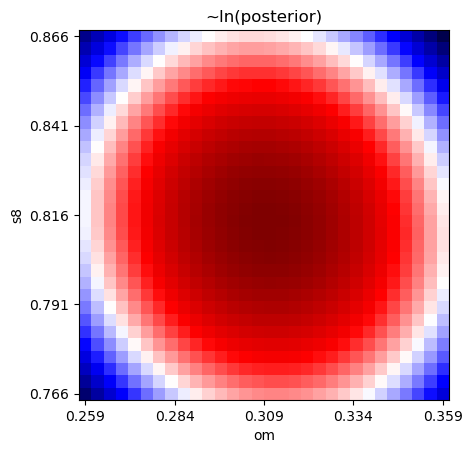

In [20]:
plt.imshow(post, origin='lower', cmap='seismic', norm=mpl.colors.Normalize())
plt.title("~ln(posterior)")
plt.ylabel("s8")
plt.xlabel("om")
plt.xticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.2589,0.3589,5,endpoint=True), decimals=3))
plt.yticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.7659,0.8659,5,endpoint=True), decimals=3))
plt.show()

x = []
y = []
for i in range(30):
    for j in range(30):
        y.append(i)
        x.append(j)
z = post.flatten()
xy = (x, y)
z_pred = ln_gauss2d_no_norm(xy, *pred_params)
z_pred = np.array(z_pred).reshape(30,30)
print(z_pred.shape)
plt.imshow(z_pred, origin='lower', cmap='seismic', norm=mpl.colors.Normalize())
plt.title("~ln(posterior)")
plt.ylabel("s8")
plt.xlabel("om")
plt.xticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.2589,0.3589,5,endpoint=True), decimals=3))
plt.yticks(np.linspace(0,29,5,endpoint=True), np.around(np.linspace(0.7659,0.8659,5,endpoint=True), decimals=3))
plt.show()

In [21]:
def gauss2d(xy, mean, cov):
    x, y = xy
    x0 = mean[0]
    y0 = mean[1]
    inner = np.linalg.inv(cov)[0,0] * (x - x0)**2
    inner += 2 * np.linalg.inv(cov)[0,1] * (x - x0) * (y - y0)
    inner += np.linalg.inv(cov)[1,1] * (y - y0)**2
    return np.exp(-0.5*(inner + 2*np.log(2*np.pi) + np.log(np.linalg.det(cov))))

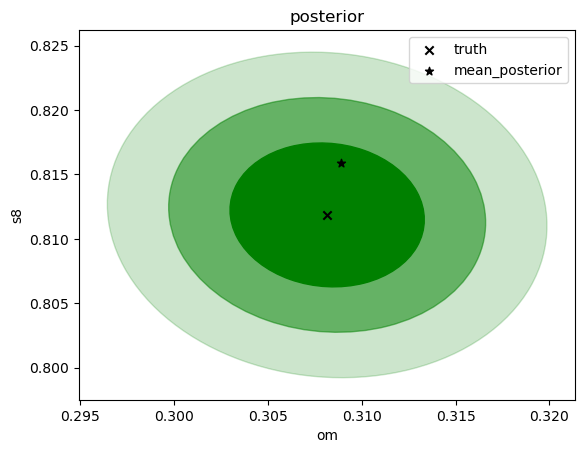

In [22]:
# x = []
# y = []
# for i in np.linspace(11,15,100):
#     for j in np.linspace(12,16,100):
#         y.append(i)
#         x.append(j)
# xy = (x, y)
# z_pred = gauss2d(xy, mean_pred, cov_pred)
# z_pred = np.array(z_pred).reshape(100,100)
# print(z_pred.shape)
# plt.imshow(z_pred, origin='lower', cmap='viridis', norm=mpl.colors.Normalize())
# plt.scatter((mean_pred[0]-12)/(16-12)*100, (mean_pred[1]-11)/(15-11)*100)
# plt.title("posterior")
# plt.ylabel("s8")
# plt.xlabel("om")
# plt.xticks(np.linspace(0,99,5,endpoint=True), np.around(np.linspace(0.2589+(0.3589-0.2589)/30*12,0.2589+(0.3589-0.2589)/30*16,5,endpoint=True), decimals=3))
# plt.yticks(np.linspace(0,99,5,endpoint=True), np.around(np.linspace(0.7659+(0.8659-0.7659)/30*11,0.7659+(0.8659-0.7659)/30*15,5,endpoint=True), decimals=3))
# plt.show()

# xc, yc = np.mgrid[0.290:0.320:0.0001, 0.800:0.820:0.0001]
# rv = multivariate_normal(mean_pred_param_space, cov_pred_param_space)
# zc = rv.pdf(np.dstack((xc, yc)))
# plt.contourf(xc, yc, zc, cmap='viridis')

fig, ax = plt.subplots()


a2 = (cov_pred_param_space[0,0] + cov_pred_param_space[1,1]) / 2 + np.sqrt((cov_pred_param_space[0,0] - cov_pred_param_space[1,1])**2 / 4 + cov_pred_param_space[0,1]**2)
b2 = (cov_pred_param_space[0,0] + cov_pred_param_space[1,1]) / 2 - np.sqrt((cov_pred_param_space[0,0] - cov_pred_param_space[1,1])**2 / 4 + cov_pred_param_space[0,1]**2)
tan2th = 2 * cov_pred_param_space[0,1] / (cov_pred_param_space[0,0] - cov_pred_param_space[1,1])
a = np.sqrt(a2)
b = np.sqrt(b2)
th = np.degrees(np.arctan(tan2th) / 2)
th = np.degrees(np.arctan2(2 * cov_pred_param_space[0,1], cov_pred_param_space[0,0] - cov_pred_param_space[1,1]) / 2)
alpha = [0, 1.52, 2.48, 3.44]
ellipse = Ellipse(xy=(mean_pred_param_space[0], mean_pred_param_space[1]), width=alpha[3]*a*2, height=alpha[3]*b*2, angle=th, color="green", alpha=0.2)
ax.add_patch(ellipse)
ellipse = Ellipse(xy=(mean_pred_param_space[0], mean_pred_param_space[1]), width=alpha[2]*a*2, height=alpha[2]*b*2, angle=th, color="green", alpha=0.5)
ax.add_patch(ellipse)
ellipse = Ellipse(xy=(mean_pred_param_space[0], mean_pred_param_space[1]), width=alpha[1]*a*2, height=alpha[1]*b*2, angle=th, color="green", alpha=1)
ax.add_patch(ellipse)

plt.scatter(mean_pred_param_space[0], mean_pred_param_space[1], marker="x", color="black", label="truth")
plt.scatter(0.3089, 0.8159, marker="*", color="black", label="mean_posterior")
plt.title("posterior")
plt.ylabel("s8")
plt.xlabel("om")
plt.legend()
plt.show()